In [1]:
from ivanoscience import *

In [2]:
kaggle_competition='digit-recognizer'

!kaggle competitions download -c {kaggle_competition} -p {raw} --quiet

In [3]:
!ls {raw}

digit-recognizer.zip  test.csv
sample_submission.csv train.csv


In [4]:
!ls {raw}/train.csv 2>&1 > /dev/null ||\
    unzip {raw}/digit-recognizer.zip -d raw

In [5]:
ls {raw}

digit-recognizer.zip   test.csv
sample_submission.csv  train.csv


In [6]:
import pandas as pd

In [7]:
df_train = pd.read_csv(f'{raw}/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
im1 = df_train.iloc[0].values[1:].reshape((28, 28))

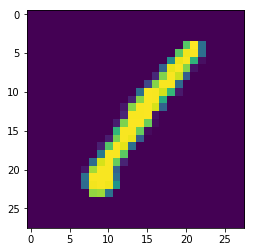

In [11]:
plt.imshow(im1)

In [12]:
len(df_train)

42000

In [13]:
df_train['label'].value_counts() / float(len(df_train))

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [14]:
df_test = pd.read_csv(f'{raw}/test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
len(df_test)

28000

In [16]:
pixels_train = df_train.loc[:, 'pixel0':'pixel783']

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [22]:
svd = TruncatedSVD(n_components=20)
svd_pixels_train = svd.fit_transform(pixels_train)

In [24]:
tsne = TSNE()
tsne_pixels_train = tsne.fit_transform(svd_pixels_train)

In [25]:
import seaborn as sns

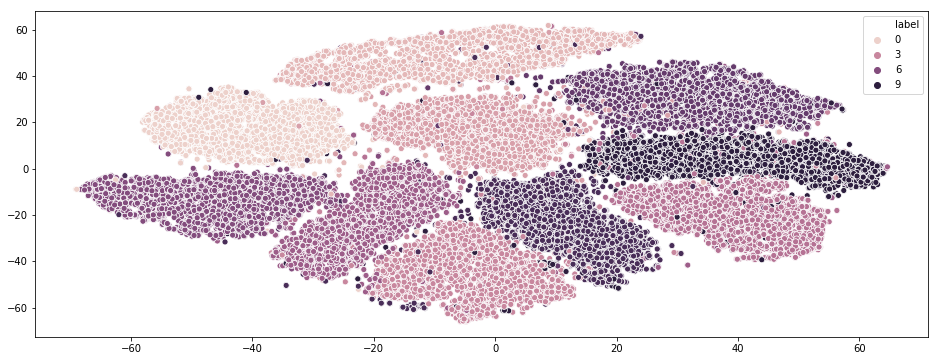

In [34]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=tsne_pixels_train[:,0], y=tsne_pixels_train[:,1], hue=df_train['label'])